### Task : Iris Flowers Classification

##### Predict the different species of flowers on the length of their petals and sepals.


### _Type of Classification_ : Multiclass

#### _Input_ : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

#### _Output_ : Class of Flower ( Setosa (0), Versicolor (1), Virginica (2) )


### Importing the necessary modules


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, neighbors, ensemble, naive_bayes, datasets, \
metrics, preprocessing, model_selection, pipeline, base

### Collecting and Analyzing the Data


In [76]:
data = datasets.load_iris()
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [77]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df['label'] = data.target_names[data.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
n_samples, n_features = df.shape

print("Number of instances :", n_samples)
print("Number of features :", n_features)

Number of instances : 150
Number of features : 6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   label              150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [6]:
# Number of instances of each class

df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [7]:
# Checking for missing values in the data

print("Is there any missing data :", any(np.sum(df.isna())))

Is there any missing data : False


In [8]:
# Checking for duplicates

print("Is there any duplicated data :", any(df.duplicated()))

Is there any duplicated data : True


In [9]:
# Dropping duplicated data

df.drop_duplicates(inplace = True)

In [10]:
print("Dimensions of the data frame :", df.shape)

Dimensions of the data frame : (149, 6)


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Correlation Matrix (Pearson Correlation Co-efficient)

corr_matrix = df.iloc[:, :-2].corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


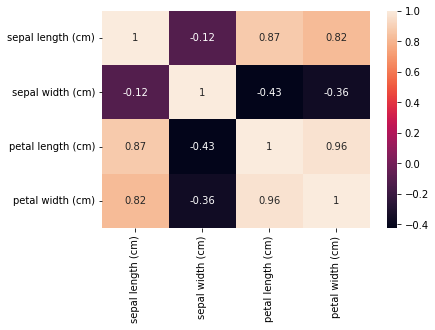

In [13]:
# Visualizing the correlation matrix with a heatmap

sns.heatmap(corr_matrix, annot = True)
plt.show()

In [14]:
# Correlation of every feature with 'petal length (cm)' (in decreasing order)

corr_with_pl = corr_matrix['petal length (cm)'].sort_values(ascending = False)
corr_with_pl

petal length (cm)    1.000000
petal width (cm)     0.962772
sepal length (cm)    0.873738
sepal width (cm)    -0.426028
Name: petal length (cm), dtype: float64

In [15]:
num_attr = np.array(corr_with_pl.keys())
target, label = 'target', 'label'

In [16]:
# Seperating the classes 

df0 = df.iloc[np.where(df[target] == 0)]
df1 = df[df[target] == 1]
df2 = df[df[target] == 2]

print(df0.shape, df1.shape, df2.shape)

(50, 6) (50, 6) (49, 6)


### Data Visualization


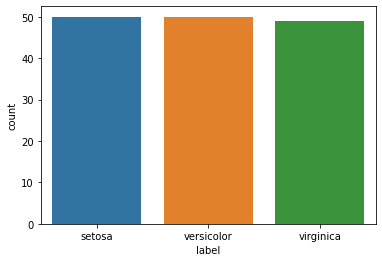

In [17]:
# Count Plot

sns.countplot(x = label, data = df)
plt.show()

Correlation Co-efficient - petal length (cm) vs petal width (cm) : -0.11812926214116291


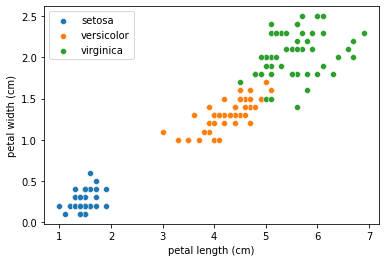

Correlation Co-efficient - petal length (cm) vs sepal length (cm) : 0.8737381423229723


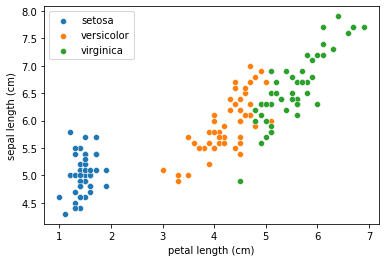

Correlation Co-efficient - petal length (cm) vs sepal width (cm) : 0.8206195219861115


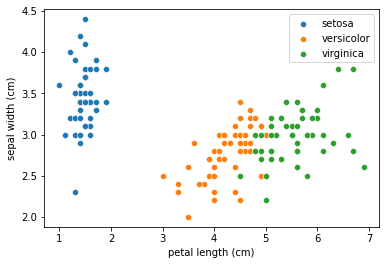

Correlation Co-efficient - petal width (cm) vs sepal length (cm) : -0.4260283114441994


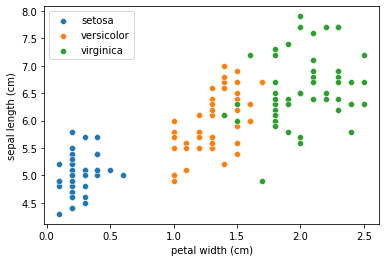

Correlation Co-efficient - petal width (cm) vs sepal width (cm) : -0.36289417651712974


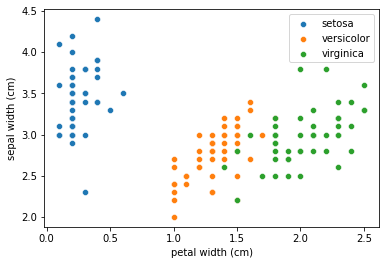

Correlation Co-efficient - sepal length (cm) vs sepal width (cm) : 0.962772294599787


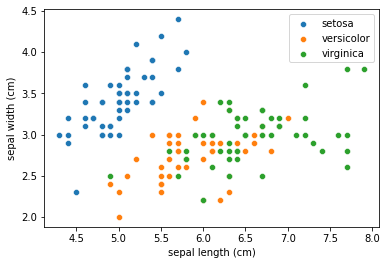

In [18]:
# Scatter Plot

for i in range(len(num_attr)):
    for j in range(i + 1, len(num_attr)):
        attr1, attr2 = num_attr[i], num_attr[j]
        print(f"Correlation Co-efficient - {attr1} vs {attr2} : {corr_matrix.iloc[i, j]}")
        sns.scatterplot(x = attr1, y = attr2, data = df0, label = df[label].unique()[0])
        sns.scatterplot(x = attr1, y = attr2, data = df1, label = df[label].unique()[1])
        sns.scatterplot(x = attr1, y = attr2, data = df2, label = df[label].unique()[2])
        plt.show()

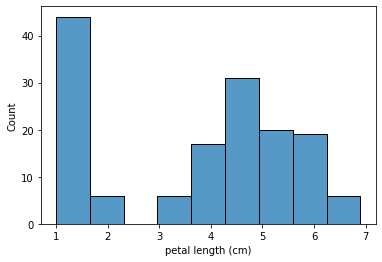

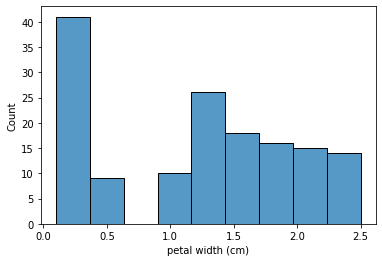

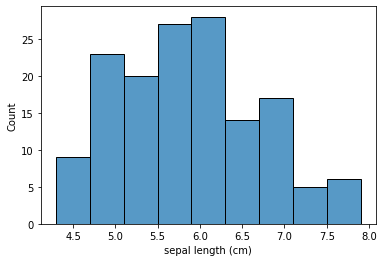

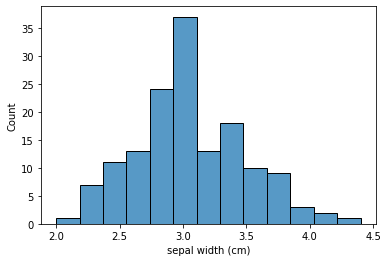

In [19]:
# Histogram

for attr in num_attr:
    sns.histplot(x = attr, data = df)
    plt.show()

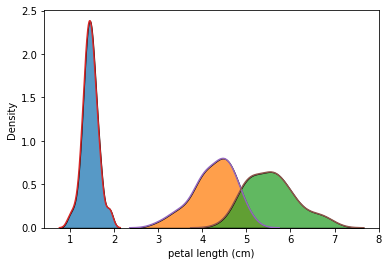

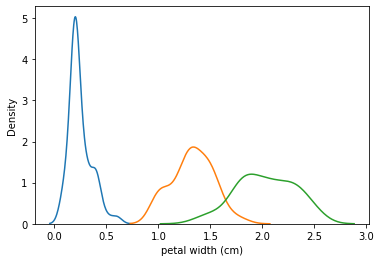

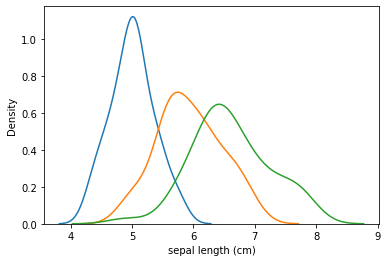

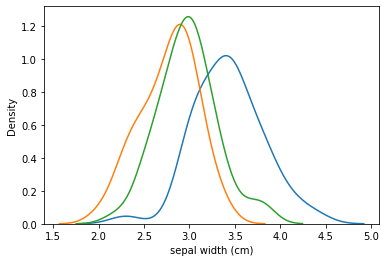

In [20]:
# Kernel Density Plot

sns.kdeplot(x = num_attr[0], data = df0, multiple = 'stack')
sns.kdeplot(x = num_attr[0], data = df1, multiple = 'stack')
sns.kdeplot(x = num_attr[0], data = df2, multiple = 'stack')

for attr in num_attr:
    sns.kdeplot(x = attr, data = df0)
    sns.kdeplot(x = attr, data = df1)
    sns.kdeplot(x = attr, data = df2)
    plt.show()

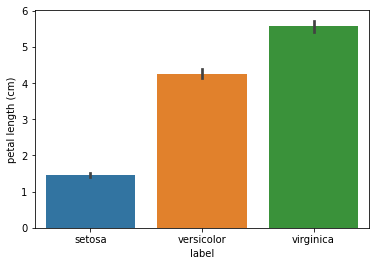

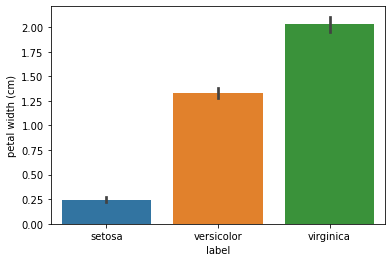

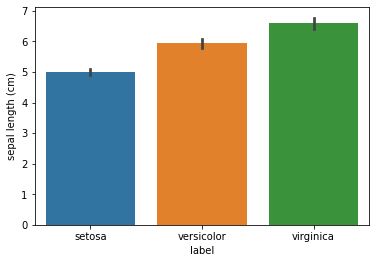

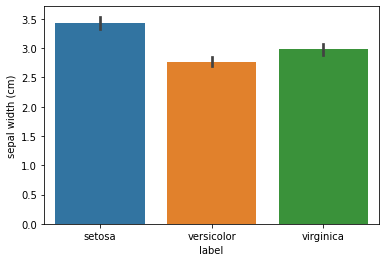

In [21]:
# Bar Chart

for attr in num_attr:
    sns.barplot(x = label, y = attr, data = df)
    plt.show()

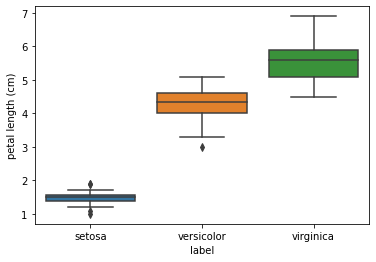

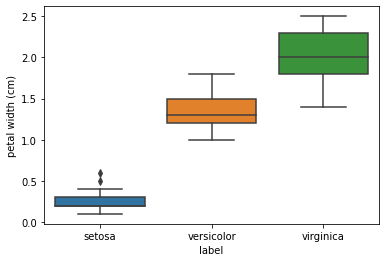

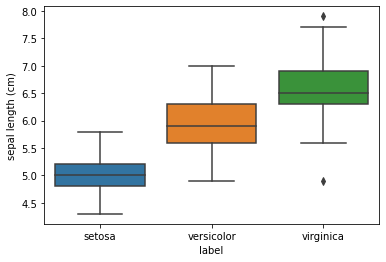

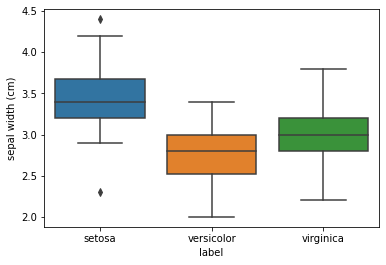

In [22]:
# Box Plot (reveals skewness)

for attr in num_attr:
    sns.boxplot(x = label, y = attr, data = df)
    plt.show()

In [79]:
# Mean 'petal length' and 'petal width' after grouping by the target class

for attr in num_attr[:2]:
    print(f"Mean {attr} : \n")
    print(df.groupby(label)[attr].mean(), '\n\n')

Mean petal length (cm) : 

label
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64 


Mean petal width (cm) : 

label
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal width (cm), dtype: float64 




Mean petal length (cm)


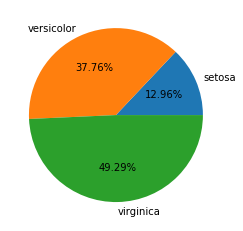

Mean petal width (cm)


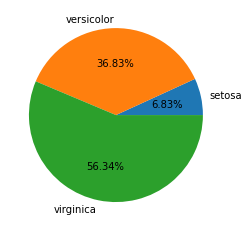

In [24]:
# Pie Chart

for attr in num_attr[:2]:
    print(f"Mean {attr}")
    plt.pie(x = df.groupby(target)[attr].mean(), labels = data.target_names, autopct = "%.2f%%")
    plt.show()

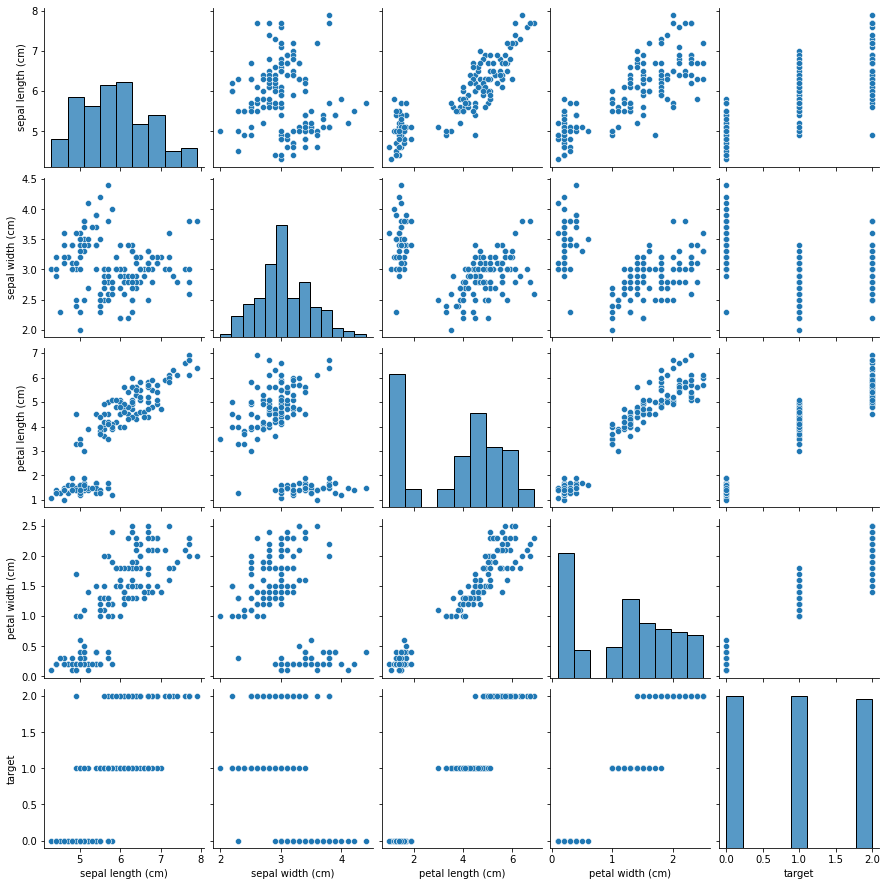

In [25]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preparation


In [26]:
X = df.drop([target, label], axis = 1).values
y = df[target].values

In [27]:
X_ = X.copy()
y_ = y.copy()

In [28]:
# Stratified Shuffle Split (Stratified Random Sampling)

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, \
                                                     random_state = 3)

for train_index, test_index in strat_split.split(df, df[target]):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

In [29]:
print("Size of train set :", y_train.shape[0])
print("Size of test set :", y_test.shape[0])

Size of train set : 119
Size of test set : 30


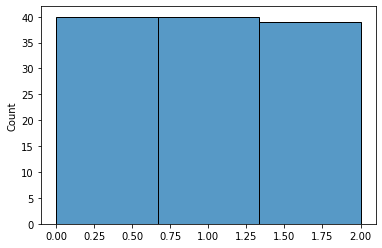

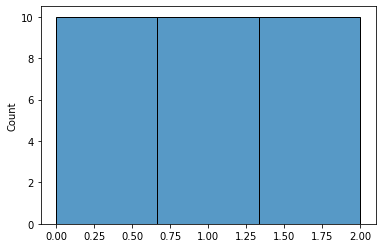

In [30]:
# Checking whether the samples are distributed uniformely or not

sns.histplot(y_train, bins = len(np.unique(y_train)))
plt.show()

sns.histplot(y_test, bins = len(np.unique(y_train)))
plt.show()

In [31]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [80]:
# Scaling the features (Standardization)

X_train_scaled = p.fit_transform(X_train)
X_test_scaled = p.fit_transform(X_test)

### Training the Model and Evaluating it's Performance


#### Through Logistic Regression (One Vs All)


In [33]:
# Implementing Logistic Regression through Batch Gradient Descent from scratch

class LogisticRegression:
    
    def __init__(self, n_iter = 10000, lr = 0.0001, tol = 0.001):
        self.n_iter = n_iter
        self.lr = lr
        self.w = self.b = None
        self.tol = tol
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        cost_ = 0
        for i in range(self.n_iter):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)
            cost = (-1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
            if (abs(cost - cost_) <= self.tol):
                break
            cost_ = cost
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        temp = self.sigmoid(z)
        y_pred = (temp > 0.5).astype(int)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
        
    @staticmethod 
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [34]:
# Number of classifiers need to be trained

n_clf = len(np.unique(y))

In [35]:
# Preparing training sets for each of the unique label

y_train_sets = []

for i in range(n_clf):
    y_train_i = (y_train == i).astype(int)
    y_train_sets.append(y_train_i)

In [36]:
# Training 'n_clf' binary classifiers

clfs = []

for i in range(n_clf):
    clf = LogisticRegression(n_iter = 100000, lr = 0.02, tol = 0.00000001)
    clfs.append(clf)
    clfs[i].fit(X_train_scaled, y_train_sets[i])

In [37]:
y_train_pred_all = []
y_train_scores = []

for i in range(n_clf):
    y_train_pred = clfs[i].predict(X_train_scaled)
    y_train_pred_all.append(y_train_pred)
    y_train_scores.append(clfs[i].score(X_train_scaled, y_train_sets[i]))

In [38]:
y_train_scores

[1.0, 0.7563025210084033, 0.9831932773109243]

In [39]:
# Stacking individual classifier predictions

y_train_pred_stacked = np.stack(y_train_pred_all, axis = 1)

In [40]:
y_train_pred_final = []

for pred in y_train_pred_stacked:
    if not any(pred):
        y_train_pred_final.append(np.argmin(y_train_scores))
    else:
        y_train_pred = np.argmax(pred + y_train_scores)
        y_train_pred_final.append(y_train_pred)

In [41]:
train_acc = np.sum(y_train == y_train_pred_final) / len(y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 0.9831932773109243


#### Sklearn Implementation


In [42]:
# Implementing Logistic Regression through Sklearn

model = linear_model.LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
y_train_pred = model.predict(X_train_scaled)

print("Train Accuracy :", model.score(X_train_scaled, y_train))

Train Accuracy : 0.9747899159663865


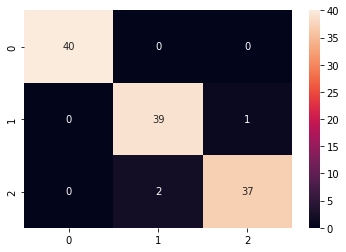

In [44]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [45]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1 = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9749786949439596
Recall or Sensitivity : 0.9747899159663865
F1 Score : 0.974781831924689


In [46]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        39

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



### Validating the model


In [47]:
y_test_pred_final = model.predict(X_test_scaled)

In [48]:
test_acc = np.sum(y_test == y_test_pred_final) / len(y_test)

print("Test Accuracy :", test_acc)

Test Accuracy : 0.9


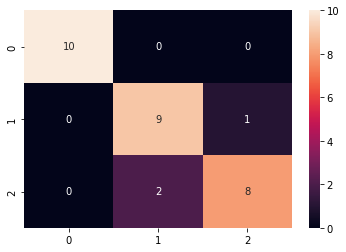

In [49]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred_final)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [50]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred_final, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_final, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_final, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9023569023569024
Recall or Sensitivity : 0.9
F1 Score : 0.8997493734335841


In [51]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred_final)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



#### Cross Validation


In [52]:
# Performing Cross Validation on Logistic Regression Model (Stratified K-Fold)

scores = model_selection.cross_val_score(linear_model.LogisticRegression(max_iter = 1000), \
                                         X, y, cv = 10)

print(scores)
print("Cross Validation Score (Average) :", np.sum(scores) / len(scores))

[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Cross Validation Score (Average) : 0.9733333333333334


### Chossing the Best Model


In [53]:
# Training different classifiers

lg = linear_model.LogisticRegression()
rf = ensemble.RandomForestClassifier()
knn = neighbors.KNeighborsClassifier()
nb = naive_bayes.GaussianNB()

lg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
nb.fit(X_train_scaled, y_train)

model_names = np.array(['Logistic Regression', "Random Forest", \
                        "K Nearest Neighbors", "Naive Bayes"])
models = np.array([lg, rf, knn, nb], dtype ='object')

In [54]:
# Evaluating performance of each model on training sets (accuracy as performance metric)

y_train_preds = np.zeros((len(models), X_train_scaled.shape[0]), dtype = int)
y_train_scores = np.zeros(len(models))

for i in range(len(models)):
    y_train_preds[i] = models[i].predict(X_train_scaled)
    y_train_scores[i] = metrics.accuracy_score(y_train, y_train_preds[i])

y_train_scores_dict = {x : y for x, y in zip(model_names, y_train_scores)}

print("Training Accuracy : \n")
for x, y in y_train_scores_dict.items():
    print(x, ":", y)

Training Accuracy : 

Logistic Regression : 0.9747899159663865
Random Forest : 1.0
K Nearest Neighbors : 0.9747899159663865
Naive Bayes : 0.9663865546218487


In [55]:
# Performing Cross Validation

avg = lambda x : np.sum(x) / len(x)
avg_cross_val_scores = np.zeros(len(models))

for i in range(len(models)):
    avg_cross_val_scores[i] = avg(model_selection.cross_val_score(models[i], X_train_scaled, y_train, cv = 10))
    
print("Average Cross Validation Score (Accuracy) : \n")
for idx, model in enumerate(model_names):
    print(model, ":", avg_cross_val_scores[idx])

Average Cross Validation Score (Accuracy) : 

Logistic Regression : 0.975
Random Forest : 0.975
K Nearest Neighbors : 0.975
Naive Bayes : 0.9575757575757574


#### Training Random Forest Classifier


In [56]:
# Random Forest Classifier

model = ensemble.RandomForestClassifier()

model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [57]:
y_train_pred = model.predict(X_train_scaled)

train_acc = np.sum(y_train == y_train_pred) / len(y_train)
print("Train Accuracy :", train_acc)

Train Accuracy : 1.0


### Choosing the Best Parameters for the Model


In [58]:
ensemble.RandomForestClassifier()

RandomForestClassifier()

#### Hyper Parameter Tuning


In [59]:
# Tuning Hyper Parameters for the selected model using Grid Search CV

param_grid_ = {
    'n_estimators' : [20, 50, 80, 100, 150, 200],
    'bootstrap' : [False, True],
    'max_depth' : [None, 5, 10],
    
}

grid_cv = model_selection.GridSearchCV(base.clone(model), param_grid = param_grid_)

grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False, True], 'max_depth': [None, 5, 10],
                         'n_estimators': [20, 50, 80, 100, 150, 200]})

In [60]:
# Getting the best parameters

print(grid_cv.best_params_)

{'bootstrap': False, 'max_depth': None, 'n_estimators': 50}


In [81]:
# Getting the best estimator

grid_cv.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=50)

In [62]:
# Cross Validation Results for each combination

cv_results = pd.DataFrame(grid_cv.cv_results_)
print("Maximum Score :", cv_results['mean_test_score'].max())
cv_results

Maximum Score : 0.975


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034369,0.011341,0.003204,0.003924,False,None,20,"{'bootstrap': False, 'max_depth': None, 'n_est...",1.000000,0.916667,1.0,0.958333,0.956522,0.966304,0.031286,34
1,0.078529,0.009914,0.006419,0.007866,False,None,50,"{'bootstrap': False, 'max_depth': None, 'n_est...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
2,0.110037,0.004786,0.014417,0.003252,False,None,80,"{'bootstrap': False, 'max_depth': None, 'n_est...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
3,0.136001,0.007990,0.012563,0.006344,False,None,100,"{'bootstrap': False, 'max_depth': None, 'n_est...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
4,0.210536,0.007932,0.018757,0.006245,False,None,150,"{'bootstrap': False, 'max_depth': None, 'n_est...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
5,0.276528,0.009371,0.031381,0.003901,False,None,200,"{'bootstrap': False, 'max_depth': None, 'n_est...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
6,0.031236,0.000320,0.000000,0.000000,False,5,20,"{'bootstrap': False, 'max_depth': 5, 'n_estima...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
7,0.073524,0.006828,0.003578,0.004496,False,5,50,"{'bootstrap': False, 'max_depth': 5, 'n_estima...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
8,0.109848,0.000002,0.015722,0.000173,False,5,80,"{'bootstrap': False, 'max_depth': 5, 'n_estima...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1
9,0.135950,0.006849,0.015624,0.000009,False,5,100,"{'bootstrap': False, 'max_depth': 5, 'n_estima...",1.000000,0.916667,1.0,0.958333,1.000000,0.975000,0.033333,1


#### Training the Model with Best Parameters


In [63]:
# Training the Model

model = grid_cv.best_estimator_

model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=50)

In [64]:
y_train_pred = model.predict(X_train_scaled)

print("Train Accuracy :", model.score(X_train_scaled, y_train))

Train Accuracy : 1.0


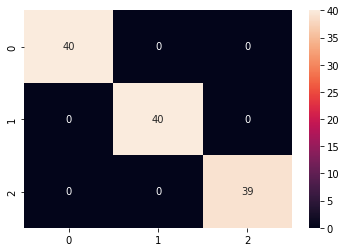

In [65]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [66]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1 = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 1.0
Recall or Sensitivity : 1.0
F1 Score : 1.0


In [69]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        39

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



### Validating the Model


In [70]:
y_test_pred = model.predict(X_test_scaled)

print("Test Accuracy :", model.score(X_test_scaled, y_test))

Test Accuracy : 0.9333333333333333


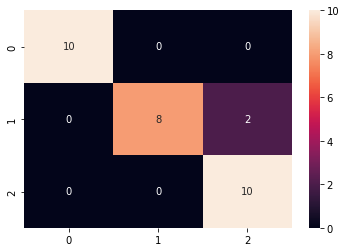

In [71]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [72]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9444444444444445
Recall or Sensitivity : 0.9333333333333333
F1 Score : 0.9326599326599326


In [73]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### Cross Validation


In [74]:
# Performing Cross Validation on whole dataset (Stratified K-Fold)

scores = model_selection.cross_val_score(base.clone(model), X, y_, cv = 10)

print(scores)
print("Cross Validation Score (Average) :", np.sum(scores) / len(scores))

[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Cross Validation Score (Average) : 0.9666666666666666


# Conclusion


#### Best Estimator : Random Forest Classifier

#### Best Parameters : ( bootstrap=False, n_estimators=50 )

#### Train Score ( Accuracy ) : 1.0

#### Test Score ( Accuracy ) : 0.93333333

#### Average Cross Validation Score on Training Set ( cv = 10 ) : 0.975

#### Average Cross Validation Score on Whole Data Set ( cv = 10 ) : 0.9666666
